In [1]:
import easyocr
import supervision as sv
import cv2
import numpy as np
from matplotlib import pyplot as plt

#from google.colab.patches import cv2_imshow(use this if you work on google colab notebook.)


In [2]:
reader = easyocr.Reader(['en'],model_storage_directory="C://Users//HP//PycharmProjects//OCR'sProject"
                        ,gpu=False)

Using CPU. Note: This module is much faster with a GPU.


In [3]:
#affichage sans detail: les coordonnées de chaque mot avec une image de texte dactylographié
result = reader.readtext('unnamed.png',detail=0, paragraph=True)
print(result)



['SERIAL NUMBER AOC1715821', 'PART NUMBER 9-00864-01']


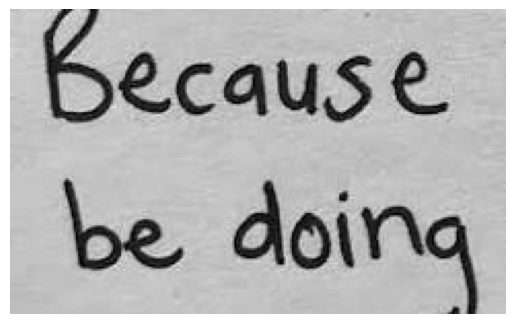

In [89]:
img2 = cv2.imread("sample1.jpeg")

plt.imshow(img2)
plt.axis('off')
plt.show('off')

In [4]:
#affichage sans detail: les coordonnées de chaque mot avec une image de texte manuscrit
result = reader.readtext('sample1.jpeg',detail=0, paragraph=True)
print(result)

['because be doing']


# ✍️ Reconnaissance d'écriture manuscrite avec EasyOCR : Pourquoi le prétraitement est indispensable

Les écritures manuscrites sont **beaucoup plus complexes** à reconnaître que le texte imprimé. Elles varient énormément selon la personne, la lisibilité, la taille, l’inclinaison, et la qualité de la prise de vue.

---

## ❗ Problèmes fréquents avec l’écriture manuscrite

- Variations dans les lettres (style personnel)
- Faible contraste entre l’encre et le fond
- Écriture floue, fine, ou incomplète
- Présence de lignes, de tâches ou d’ombres
- Papier froissé ou mal scanné

Même si EasyOCR supporte certains alphabets manuscrits, il est souvent **moins performant sur des images brutes ou sales**.

---

## ✅ Pourquoi faire un prétraitement ?

Le prétraitement aide EasyOCR à :
- **Isoler les traits manuscrits**
- **Renforcer le contraste** entre l’encre et le papier
- **Réduire les parasites** comme les tâches ou les ombres
- **Uniformiser** le fond (blanc) pour éviter les interférences
- **Agrandir** les caractères trop petits
- **Redresser** le texte si l’image est inclinée

---

## 🧰 Exemples d’actions utiles en prétraitement

- Passage en **niveaux de gris**
- **Amélioration locale du contraste** 
- **Filtrage de bruit**
- **Binarisation** (noir/blanc) avec du seulliage
- **Agrandissement du texte** avec les morphologies mathematiques

---

NB: Le prétraitement dépend fortement du style d'ecriture, ce qui rend très difficile une reconnaissance parfaite.

We Sfact With Good
Because
all
businesses should
be
doing
Som
Ood
~thin)


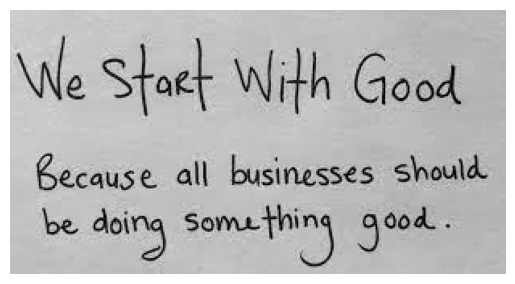

In [92]:
# Read image with opencv
img = cv2.imread("sample2 (2).png")

result3 = reader.readtext(img)
for res in result3:
    coord=res[0]
    text=res[1]
    conf=res[2]
    print(text)
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.show('off')

Il est visible ci-dessous que l'ajout du pretraitement donne une précision differente pour la même image.

We Start Wifh Good
Becquse
all businesses shaula
be
dbing Somcthin)
Jod ,


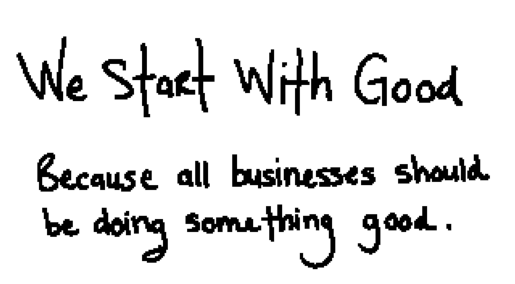

In [81]:
##ici avec l'ajout d'un seulliage , ameliore certaine region et d'autre non

# Conversion en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, image = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY)
# Suppression du bruit
blur = cv2.GaussianBlur(image, (1, 1), 0)
#application d'une érosion
# Définir un noyau (kernel) 3x3
kernel = np.ones((2, 2), np.uint8)

ero_image = cv2.erode(blur, kernel, iterations=1)
result3 = reader.readtext(ero_image)
for res in result3:
    coord=res[0]
    text=res[1]
    conf=res[2]
    print(text)
plt.imshow(ero_image, cmap = 'gray')
plt.axis('off')
plt.show('off')

We Stact With Good
Because
all businesses should
be
doirg
9%4
Somcthing


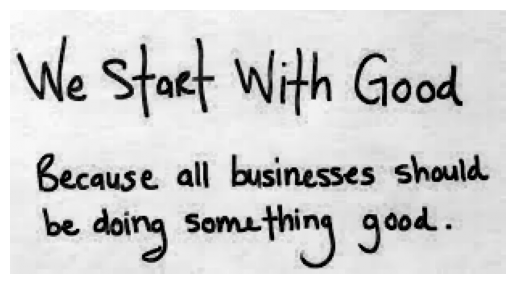

In [91]:
###le meilleure prétraitement###
# Conversion en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


#application de la dilatation
# Définir un noyau (kernel) 3x3
kernel = np.ones((2, 2), np.uint8)

ero_image = cv2.erode(gray, kernel, iterations=1)


result3 = reader.readtext(ero_image)
for res in result3:
    coord=res[0]
    text=res[1]
    conf=res[2]
    print(text)
plt.imshow(ero_image, cmap = 'gray')
plt.axis('off')
plt.show('off')

We Sfact Wifh Good
Because
all
businesses should
be
Som
thing
9od_
doing


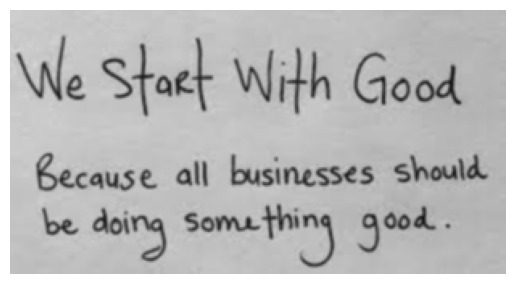

In [86]:
##ici l'image a deja un bon rendu grayscale du coup on peut directement juste appliquer flou
##pour supprimer le bruit

# Suppression du bruit
blur = cv2.GaussianBlur(img, (3, 3), 0)

result3 = reader.readtext(blur)
for res in result3:
    coord=res[0]
    text=res[1]
    conf=res[2]
    print(text)


plt.imshow(blur, cmap='gray')
plt.axis('off')
plt.show('off')


We Sfart Wifh Goad
Because
all businesses should
b
dr3 Sottn) %*4 _


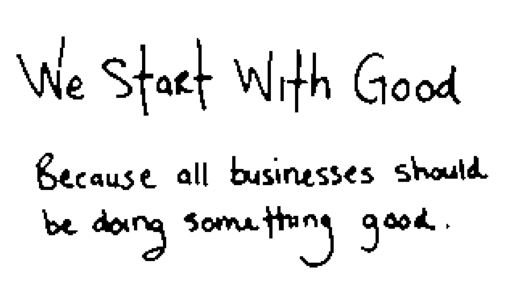

In [80]:
# Seuillage adaptatif
_, image = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Étape 2 : Denoising (optionnel mais recommandé)
equalized = cv2.medianBlur(image, 3)

result3 = reader.readtext(equalized)
for res in result3:
    coord=res[0]
    text=res[1]
    conf=res[2]
    print(text)

plt.imshow(equalized, cmap='gray')
plt.axis('off')
plt.show('off')

Using CPU. Note: This module is much faster with a GPU.


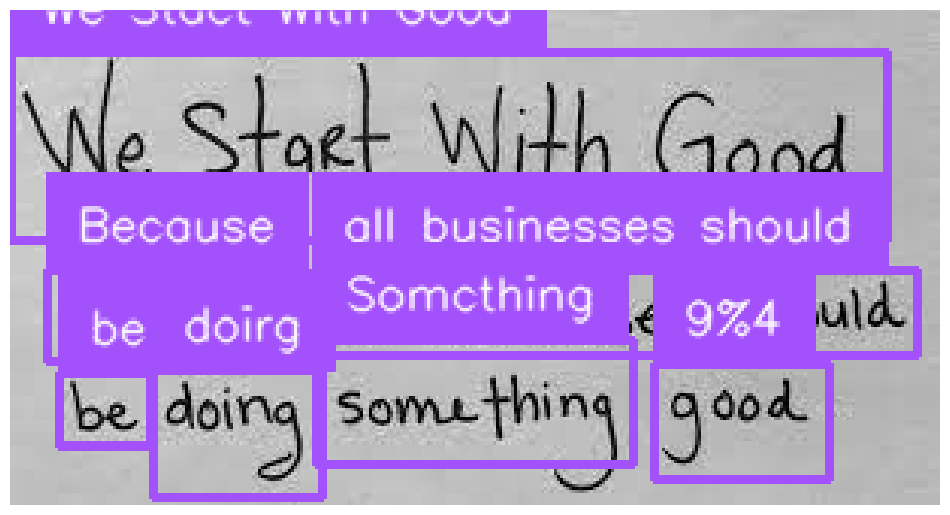

True

In [71]:
# Chemin de l'image
Image_path = 'sample2 (2).png'

# Initialiser le lecteur EasyOCR (langue anglaise, CPU utilisé)
reader = easyocr.Reader(['en'], gpu=False, model_storage_directory="C://Users//HP//PycharmProjects//OCR'sProject")

# Charger l'image avec OpenCV
image = cv2.imread(Image_path)

# Conversion en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Application de l’érosion
# Définir un noyau (kernel) 2x2
kernel = np.ones((2, 2), np.uint8)

# Appliquer l’érosion à l’image en niveaux de gris
ero_image = cv2.erode(gray, kernel, iterations=1)

# Effectuer la détection de texte sur l’image traitée
result = reader.readtext(ero_image)

# Préparer les listes pour les boîtes englobantes, les confiances, les ID de classes et les étiquettes
xyxy, confidences, class_ids, label = [], [], [], []

# Extraire les données des résultats OCR
for detection in result:
    bbox, text, confidence = detection[0], detection[1], detection[2]

    # Convertir le format de la boîte englobante
    x_min = int(min([point[0] for point in bbox]))
    y_min = int(min([point[1] for point in bbox]))
    x_max = int(max([point[0] for point in bbox]))
    y_max = int(max([point[1] for point in bbox]))

    # Ajouter les données aux listes
    xyxy.append([x_min, y_min, x_max, y_max])
    label.append(text)
    confidences.append(confidence)
    class_ids.append(0)

# Convertir les listes en tableaux NumPy
detections = sv.Detections(
    xyxy=np.array(xyxy),
    confidence=np.array(confidences),
    class_id=np.array(class_ids)
)

# Annoter l’image avec les boîtes et les étiquettes
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections, labels=label)

# Afficher et enregistrer l’image annotée
sv.plot_image(image=annotated_image)
cv2.imwrite("Output.jpg", annotated_image)
